In [3]:
from IPython.display import Image

# 1 MNIST 데이터

## 1.1 MNIST 데이터로 한 번 더 DL 과정을 복습해보자

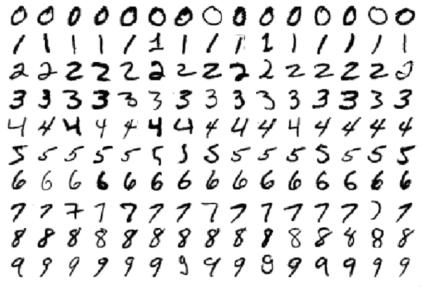

In [5]:
Image("MNIST1.png")

- MNIST 데이터에 대해서는 kNN에서 설명을 했었다.

## 1.2 Tensorflow에서 MNSIT 읽기

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2022-11-24 14:53:41.516781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 14:53:41.621114: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-24 14:53:42.046432: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-11-24 14:53:42.046478: W tensorflow/compiler/xla/strea

- 각 픽셀이 255값이 최댓값이어서 0~1사이의 값으로 조정 (일종의 min max scaler)

## 1.3 one-hot-encoding

- 이 타이밍에 one-hot-encoding을 해야 한다.
- 그런데 또 하나의 방법이 loss 함수를 sparse_categorical_crossentropy 로 설정하면 같은 효과이다.
- 그래서 pass~

## 1.4 이번 모델

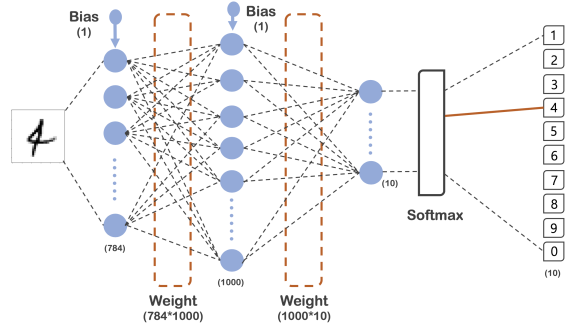

In [6]:
Image("MNIST2.png")

## 1.5 모델을 만들어보자

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

2022-11-24 14:53:43.646187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 14:53:43.653862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 14:53:43.654325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 14:53:43.655287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

## 1.6 다시 한 번 더 softmax란?

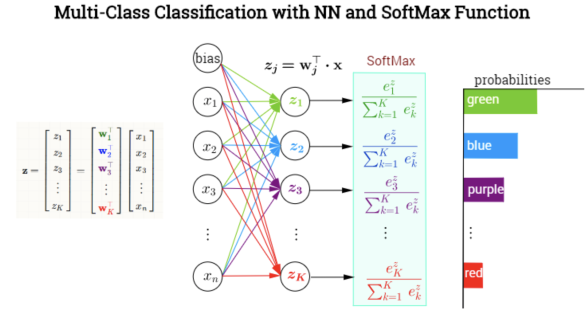

In [7]:
Image("MNIST3.png")

## 1.7 model.summary

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


## 1.8 코드와 모델은 일치한다

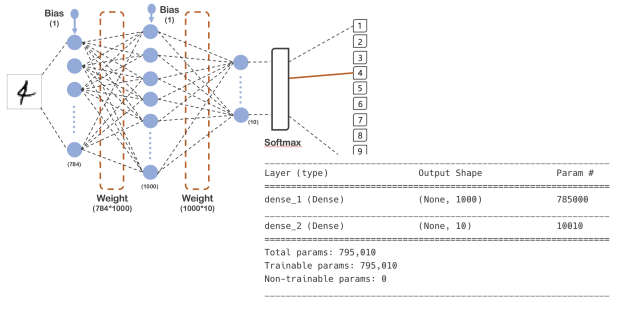

In [8]:
Image("MNIST4.png")

## 1.9 fit~

In [4]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/10


2022-11-24 14:53:47.324520: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-24 14:53:47.325730: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f5e4dca1a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-24 14:53:47.325744: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-11-24 14:53:47.328774: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-11-24 14:53:47.414715: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 [==============================] - 2s 1ms/step - loss: 0.2218 - accuracy: 0.9351 - val_loss: 0.1122 - val_accuracy: 0.9679
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0845 - accuracy: 0.9744 - val_loss: 0.0775 - val_accuracy: 0.9756
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.0697 - val_accuracy: 0.9785
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0641 - val_accuracy: 0.9796
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0643 - val_accuracy: 0.9817
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0672 - val_accuracy: 0.9807
Epoch 8/10
600/60

## 1.10 acc와 loss를 그려보자

## 1.11 이상적인 수렴 상황

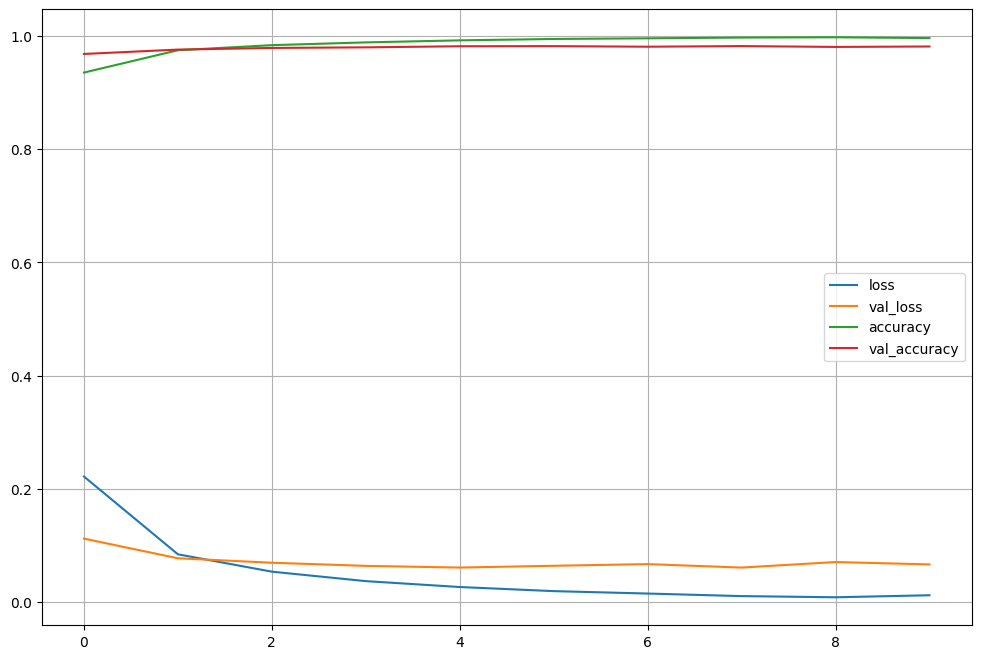

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

## 1.12 머신러닝에서 93%쯤 나왔던 결과대비 5%쯤 향상되었다

In [8]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test acccuracy :', score[1])

313/313 [==============================] - 0s 888us/step - loss: 0.0667 - accuracy: 0.9811
Test loss : 0.06672648340463638
Test acccuracy : 0.9811000227928162


## 1.13 뭐가 틀렸나 확인해보자

In [9]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 598us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [10]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

## 1.14 틀린 데이터의 인덱스만 모아서

In [11]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

189

## 1.15 그중 16개만

In [12]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[1319,
 3073,
 1247,
 582,
 4740,
 2597,
 9729,
 2293,
 9792,
 4360,
 4360,
 115,
 1717,
 4536,
 3405,
 4978]

## 1.16 뭘 틀렸나?

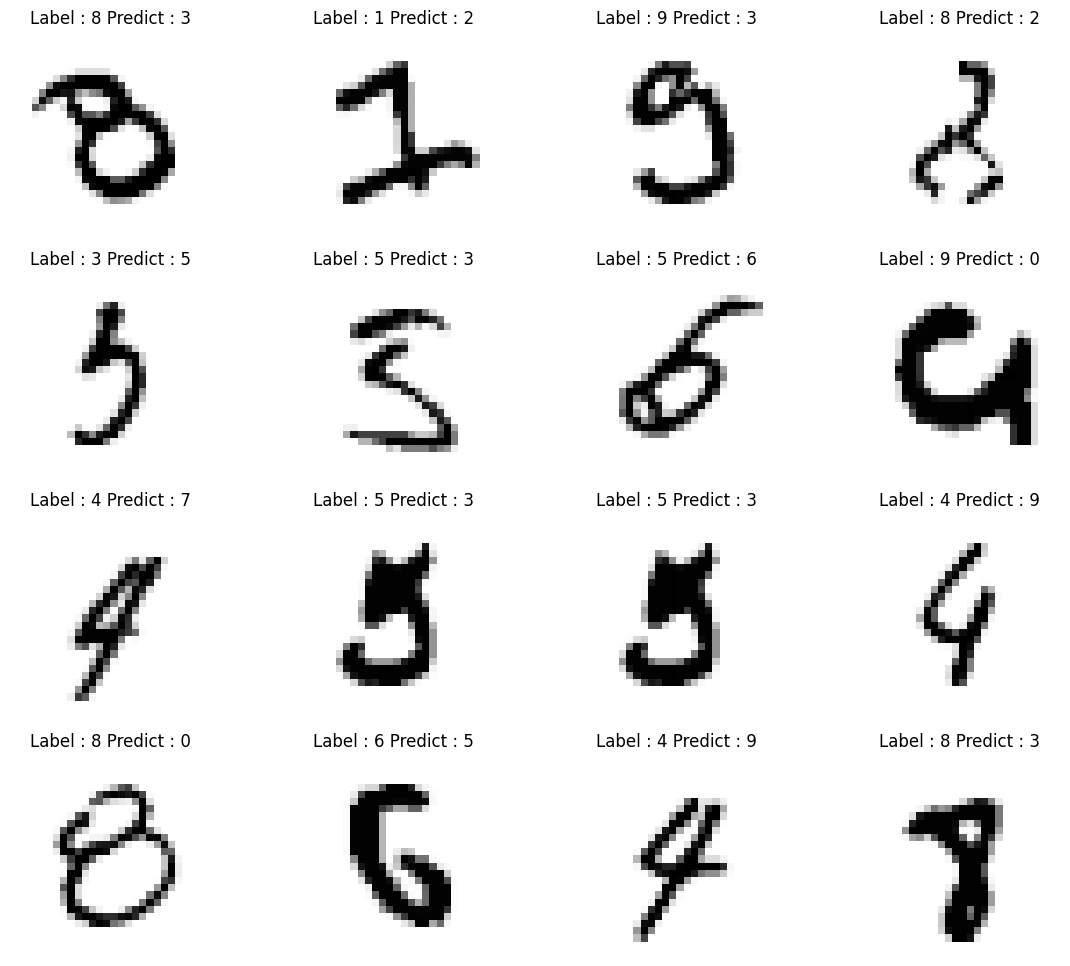

In [14]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

## 1.17 나도 틀릴만한게 있네

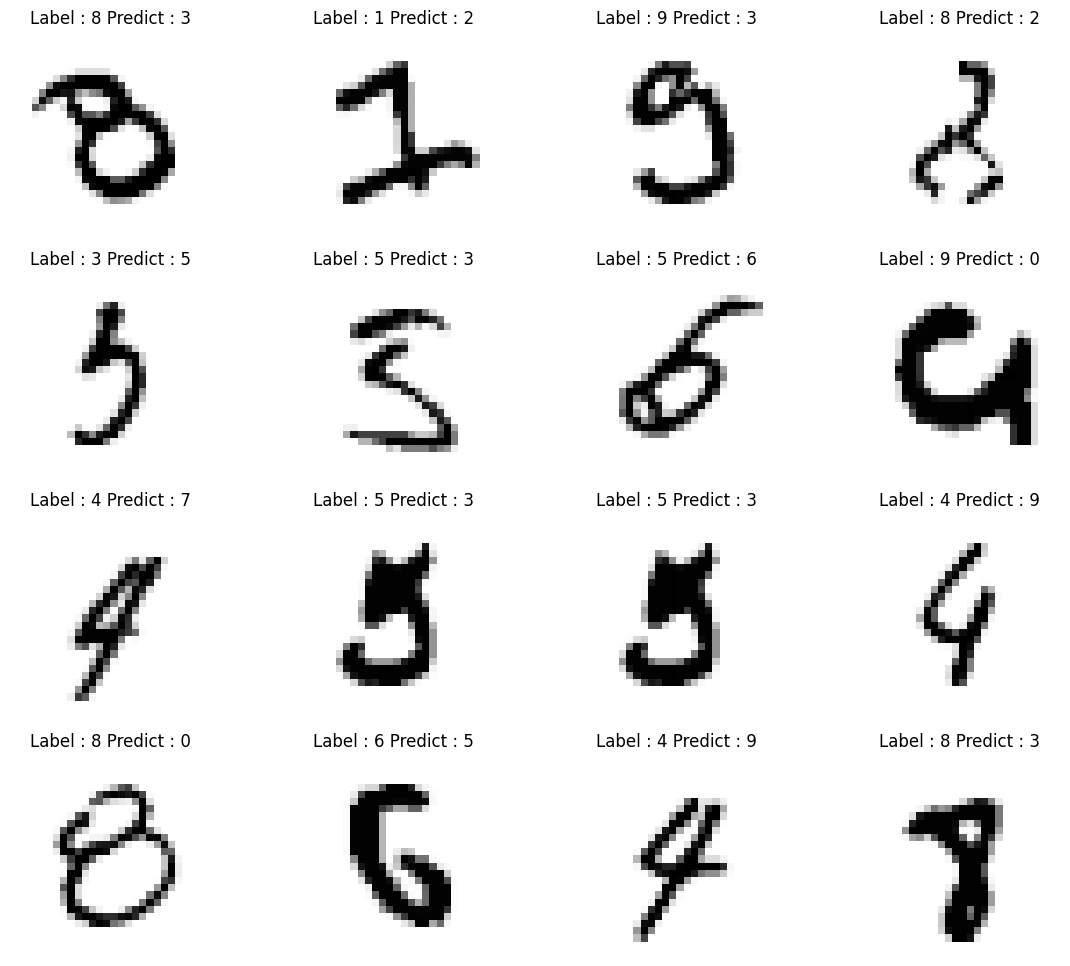

In [9]:
Image("MNIST5.png")

# 2 MNIST fashion

## 2.1 MNIST fashion data

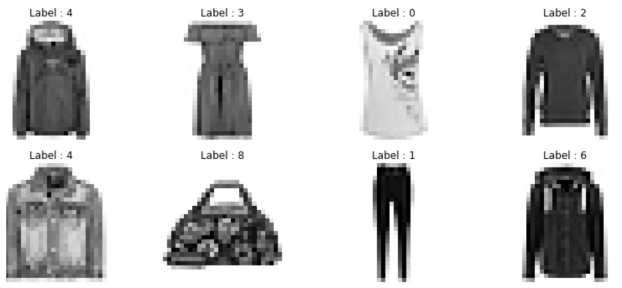

In [10]:
Image("MNIST6.png")

- 숫자로 된 MNIST데이터처럼 28*28 크기의 패션과 관련된 10개 종류의 데이터

## 2.2 데이터 읽기

In [16]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


## 2.3 어떻게 생겼는지 확인해보자

## 2.4 패션

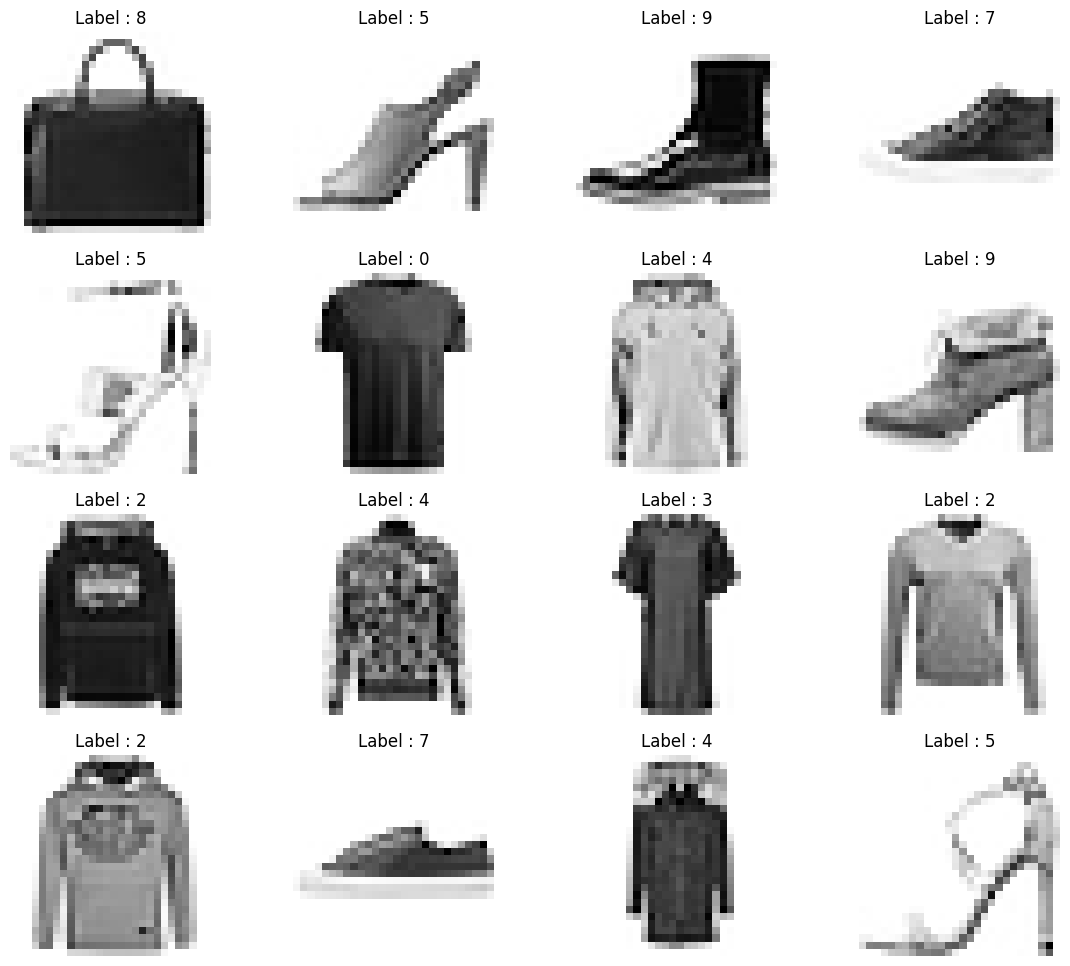

In [19]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0,len(y_train)), k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')

plt.show()

## 2.5 모델은 숫자때와 동일한 구조로 두자

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 2.6 summary

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


## 2.7 fit

In [22]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.4864 - accuracy: 0.8287 - val_loss: 0.4329 - val_accuracy: 0.8428
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8704 - val_loss: 0.4043 - val_accuracy: 0.8521
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3259 - accuracy: 0.8815 - val_loss: 0.3413 - val_accuracy: 0.8742
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2971 - accuracy: 0.8910 - val_loss: 0.3510 - val_accuracy: 0.8707
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2810 - accuracy: 0.8973 - val_loss: 0.3400 - val_accuracy: 0.8762
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2677 - accuracy: 0.9000 - val_loss: 0.3432 - val_accuracy: 0.8766
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2529 - accuracy: 0.9063 - val_loss: 0.3362 - val_accuracy: 0.8786
Epoch 

## 2.8 학습 상황을 관찰해 보자

## 2.9 잘 학습이 되는듯 하지만,

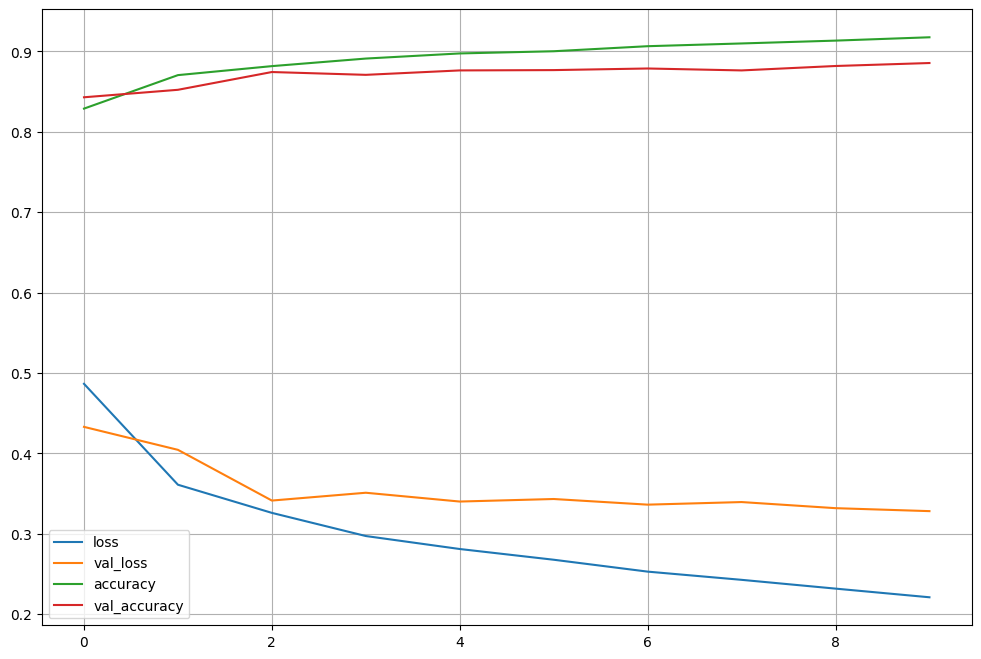

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

- val_loss와 train loss사이에 간격이 발생한다.

## 2.10 테스트데이터 accuracy

In [24]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test acccuracy :', score[1])

313/313 [==============================] - 0s 875us/step - loss: 0.3281 - accuracy: 0.8854
Test loss : 0.32810690999031067
Test acccuracy : 0.8853999972343445


## 2.11 어떤 데이터가 틀렸는지 추출하고

In [25]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 583us/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [26]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

## 2.12 틀린 데이터를 모아서

In [28]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1146

## 2.13 16개만 선택해서

In [27]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2534,
 3808,
 1260,
 1226,
 4078,
 2488,
 4201,
 1014,
 2927,
 3475,
 1850,
 445,
 3817,
 381,
 6571,
 1319]

## 2.14 그리고 결과.

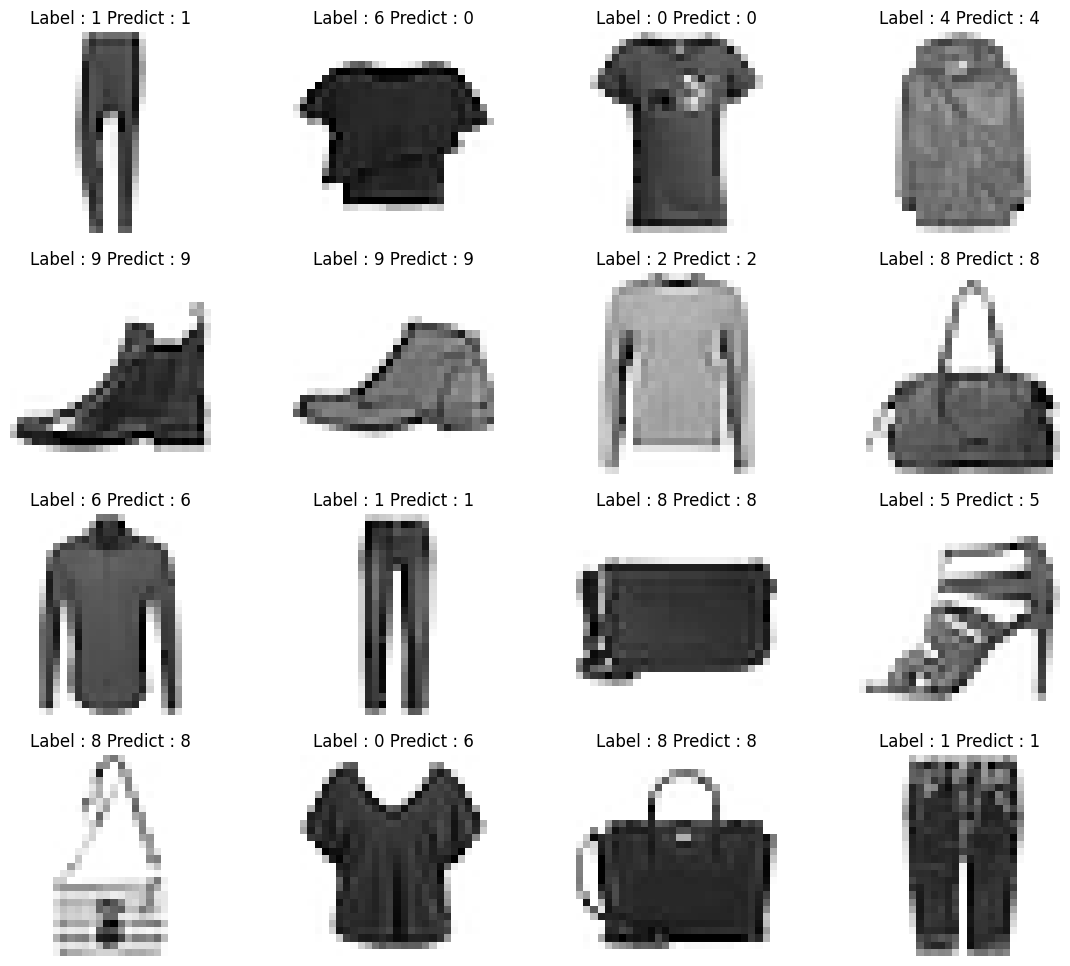

In [29]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()


- 0 : 티셔츠
- 1 : 바지
- 2 : 스웨터
- 3 : 드레스
- 4 : 코트
- 5 : 샌들
- 6 : 셔츠
- 7 : 운동화
- 8 : 가방
- 9 : 부츠